## Agent 2

This demostrates the sequential flow in langgraph agents.

**Define Types**

In [1]:
from typing import TypedDict, Dict, List

class ItemsDict(TypedDict):
    name : str
    price : int

class AgentState(TypedDict):
    items : List[ItemsDict]
    cheapest : ItemsDict
    expensive : ItemsDict


def get_min(state: AgentState) -> AgentState:
    cheapest = min(state["items"], key=lambda x: x["price"])
    state["cheapest"] = cheapest
    return state

def get_max(state: AgentState) -> AgentState:
    cheapest = max(state["items"], key=lambda x: x["price"])
    state["expensive"] = cheapest
    return state

**Define agent state graph**

In [2]:
from langgraph.graph import StateGraph

graph = StateGraph(AgentState)

graph.add_node("cheapest", get_min)
graph.add_node("expensive", get_max)

# Sequential execution, expensive after cheapest
graph.add_edge("cheapest", "expensive")

graph.set_entry_point("cheapest")
graph.set_finish_point("expensive")

agent = graph.compile()

items : List[ItemsDict] = [
    {"item": "Apple", "price": 30},
    {"item": "Banana", "price": 10},
    {"item": "Orange", "price": 20},
]

agent.invoke({"items": items})

{'items': [{'item': 'Apple', 'price': 30},
  {'item': 'Banana', 'price': 10},
  {'item': 'Orange', 'price': 20}],
 'cheapest': {'item': 'Banana', 'price': 10},
 'expensive': {'item': 'Apple', 'price': 30}}

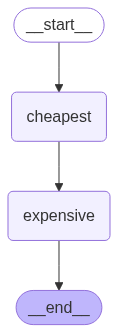

In [3]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

Here, we have a sequential execution starting from cheapest node to expensive node.